#### Hello everyone,

This notebook is a simple overview on a famous dataset (more nerd than famous) about Pokèmons

The goal of this notebook is to show some examples of matplotlib code.

P.S. I used just the first generation of Pokèmons. Is the only one I know, sorry.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
poke = pd.read_csv("Pokemon.csv")

In [3]:
poke_1 = poke[poke.Generation == 1].copy()
poke_1 = poke_1[~poke_1.Name.str.contains("Mega")].drop(["Type 2","Generation","Legendary"],axis=1).copy()

In [4]:
poke_1.shape

(151, 10)

In [5]:
set(poke_1["Type 1"])

{'Bug',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Water'}

In [6]:
col_dict = {}
col_dict['Water'] = "#007FFF"
col_dict['Normal'] = "#B2BEB5"
col_dict['Poison'] = "#8F5973"
col_dict['Bug'] = "#87A96B"
col_dict['Fire'] = "#FF033E"
col_dict['Grass'] = "#008000"
col_dict['Rock'] = "#C39953"
col_dict['Electric'] = "#FFBF00"
col_dict['Psychic'] = "#915C83"
col_dict['Ground'] = "#967117"
col_dict['Fighting'] = "#8A0303"
col_dict['Ghost'] = "#3D2B1F"
col_dict['Dragon'] = "#FD7C6E"
col_dict['Fairy'] = "#FFE4C4"
col_dict['Ice'] = "#BCD4E6"

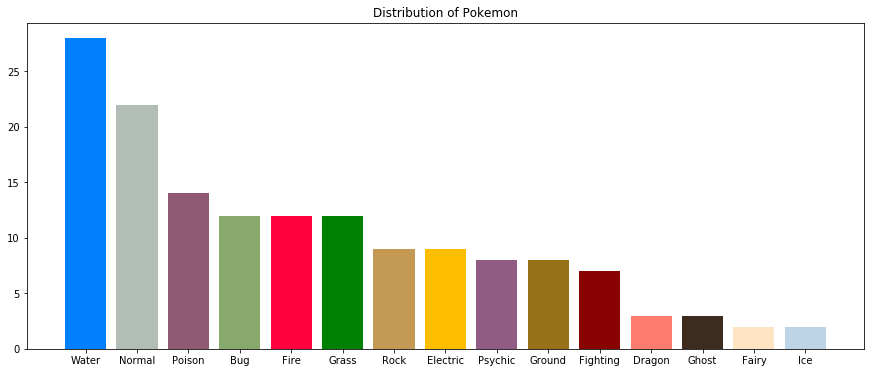

In [7]:
tipo = poke_1["Type 1"].value_counts().reset_index()
tipo.columns = ["tipo","count"]

count = tipo["count"].values
order = range(1,len(count)+1)
LABELS = tipo.tipo

plt.figure(figsize=(15,6))
colors = [col_dict[l] for l in LABELS]

plt.bar(order, count, align='center', color=colors)
plt.xticks(order, LABELS)
plt.title("Distribution of Pokemon")
plt.show()

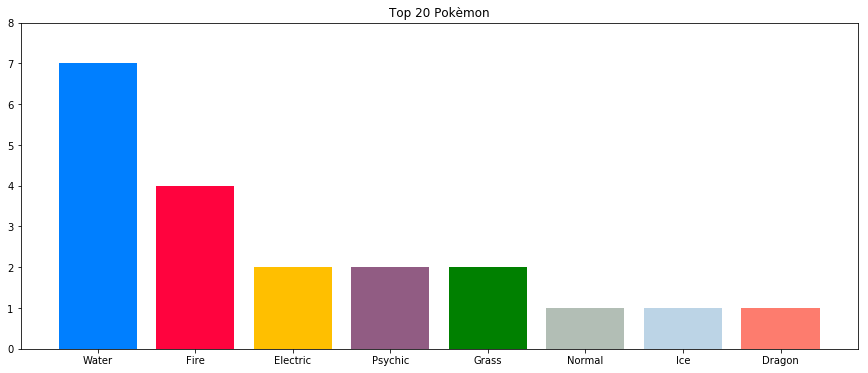

In [8]:
tipo_top = poke_1.sort_values("Total", ascending=False)[0:20]["Type 1"].value_counts().reset_index()
tipo_top.columns = ["tipo","count"]

count = tipo_top["count"].values
order = range(1,len(count)+1)
LABELS = tipo_top.tipo

colors_top = [col_dict[l] for l in LABELS]

plt.figure(figsize=(15,6))
plt.bar(order, count, align='center', color=colors_top)
plt.xticks(order, LABELS)
plt.ylim(min(order)-1,max(order))
plt.title("Top 20 Pokèmon")
plt.show()

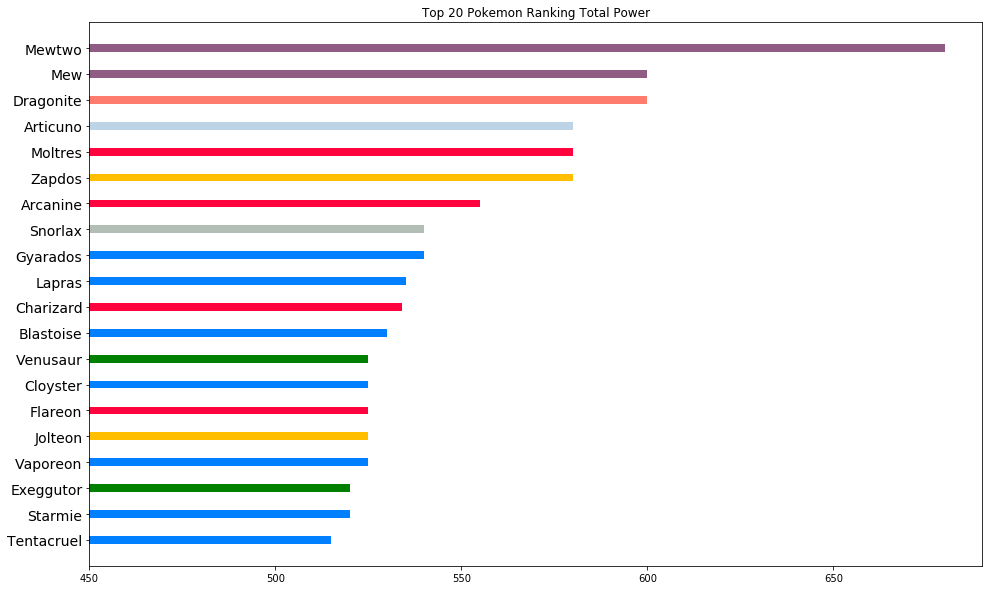

In [9]:
tmp3 = poke_1.sort_values("Total", ascending=False)[0:20]
temp4 = tmp3[tmp3.columns[1:4]][::-1]

order = range(1,temp4.shape[0]+1)
count = temp4["Total"].values

LABELS_col = temp4["Type 1"]
LABELS = temp4.Name

colors_top = [col_dict[l] for l in LABELS_col]

plt.figure(figsize=(16,10))
plt.barh(order, count, align='center', color=colors_top, height=0.3)
plt.yticks(order, LABELS, fontsize=14)
plt.ylim(min(order)-1,max(order)+1)
plt.xlim(450,max(count)+10)
plt.title("Top 20 Pokemon Ranking Total Power")
plt.show()

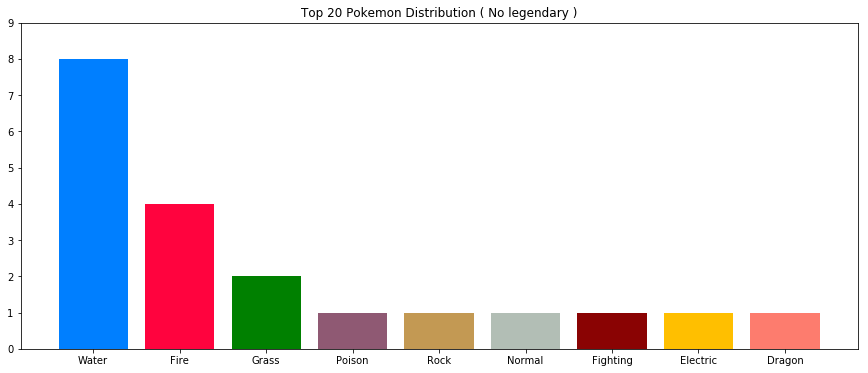

In [10]:
poke_2 = poke_1[~poke_1.Name.str.contains("Mewtwo|Mew|Articuno|Moltres|Zapdos")]
tipo_top_nol = poke_2.sort_values("Total", ascending=False)[0:20]["Type 1"].value_counts().reset_index()
tipo_top_nol.columns = ["tipo","count"]

count = tipo_top_nol["count"].values
order = range(1,len(count)+1)
LABELS = tipo_top_nol.tipo

colors_top = [col_dict[l] for l in LABELS]

plt.figure(figsize=(15,6))
plt.bar(order, count, align='center', color=colors_top)
plt.xticks(order, LABELS)
plt.ylim(min(order)-1,max(order))
plt.title("Top 20 Pokemon Distribution ( No legendary )")
plt.show()

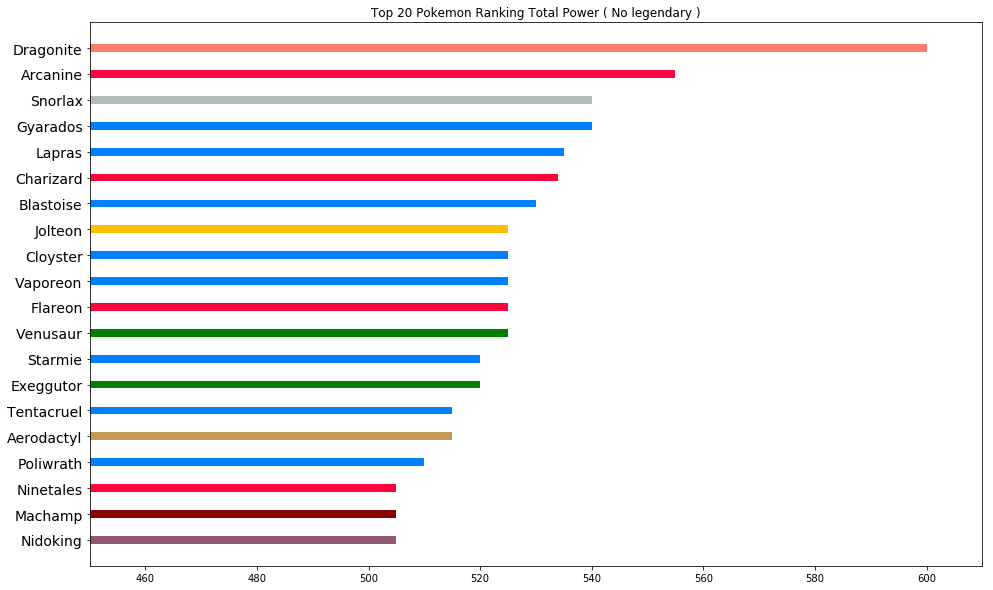

In [11]:
tmp = poke_2.sort_values("Total", ascending=False)[0:20]
temp2 = tmp[tmp.columns[1:4]][::-1]

order = range(1,temp2.shape[0]+1)
count = temp2["Total"].values

LABELS_col = temp2["Type 1"]
LABELS = temp2.Name

colors_top = [col_dict[l] for l in LABELS_col]

plt.figure(figsize=(16,10))
plt.barh(order, count, align='center', color=colors_top, height=0.3)
plt.yticks(order, LABELS, fontsize=14)
plt.ylim(min(order)-1,max(order)+1)
plt.xlim(450,max(count)+10)
plt.title("Top 20 Pokemon Ranking Total Power ( No legendary )")
plt.show()

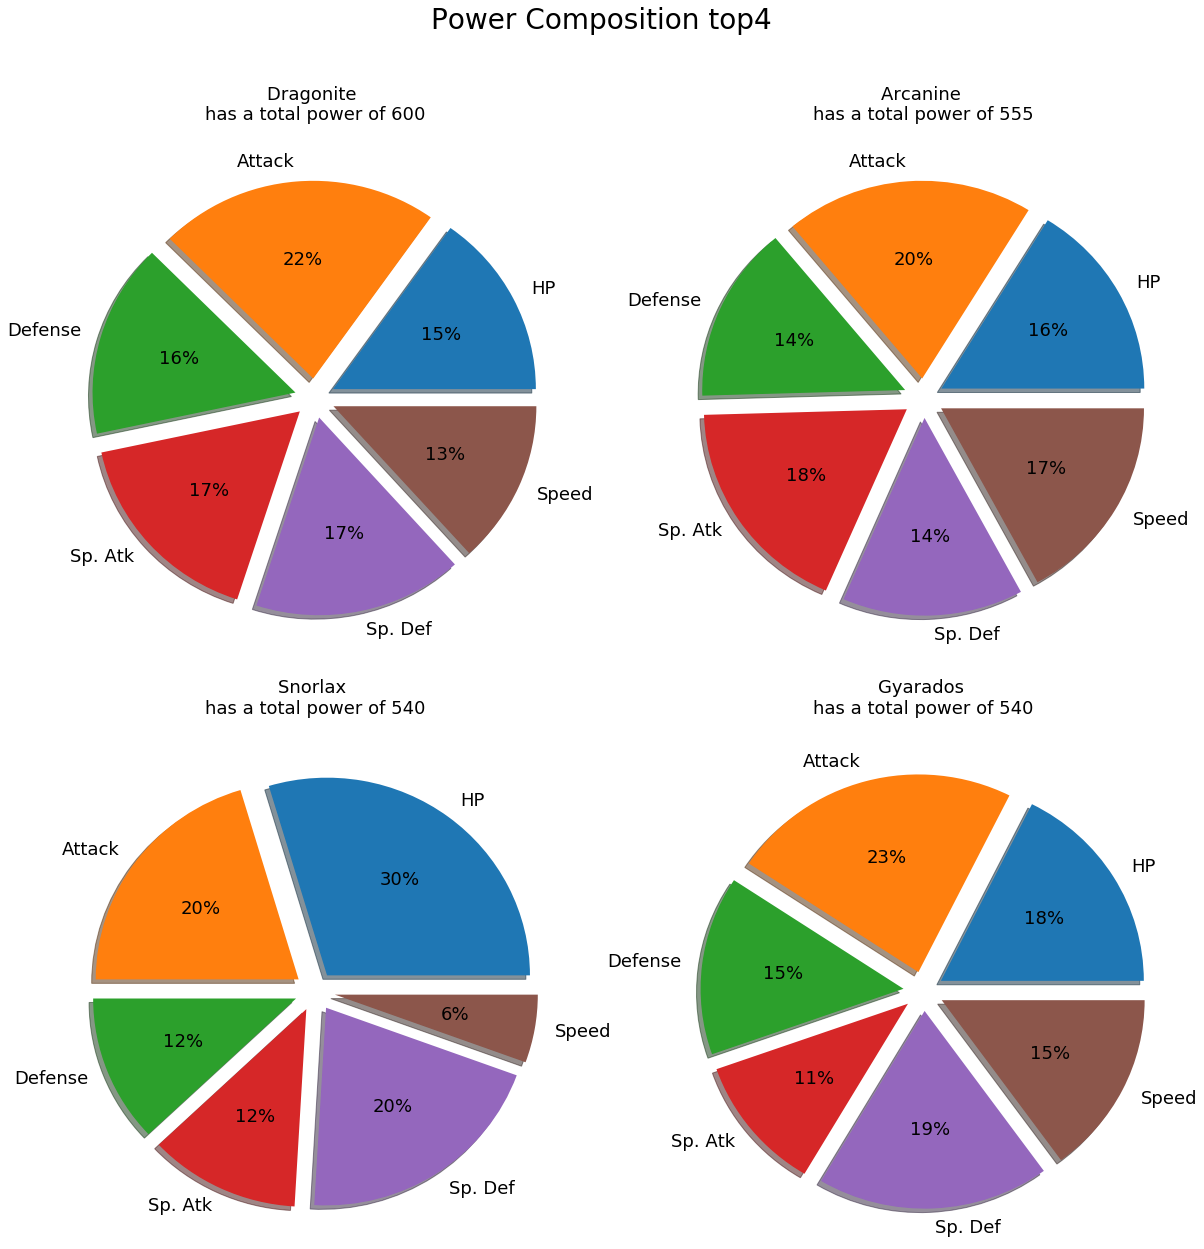

In [12]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
plt.suptitle('Power Composition top4', fontsize=28)

for i,name in enumerate(tmp[0:4].Name.values):

    app = tmp[tmp['Name'] == name][tmp.columns[4:]].T.reset_index()
    app.columns = ['stats','amount']
    
    explode = list()
    for k in app.stats:
        explode.append(0.1)
    
    if i < 2:
        n = 0
        m = i
    else:
        m = i - 2
        n = 1
    
    patches, texts, autotexts = ax[n,m].pie(app.amount, labels=app.stats, explode= explode, autopct='%.0f%%', shadow=True)
    autotexts = [ _.set_fontsize(18) for _ in autotexts ]
    texts = [ _.set_fontsize(18) for _ in texts ]
    ax[n,m].set_title("{} \nhas a total power of {}".format(name,app.amount.sum()),fontsize=18, position=[.5, 1.05])
plt.show()

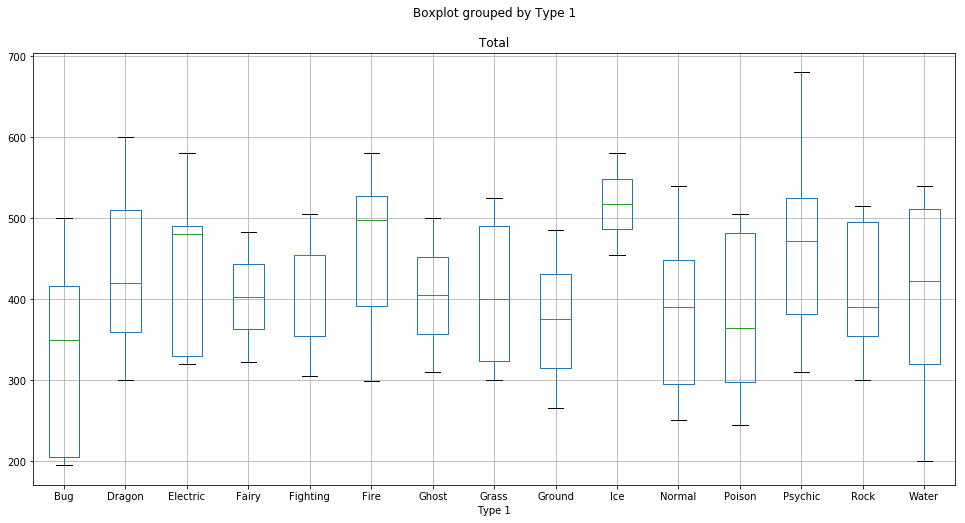

In [13]:
poke_1.boxplot(column="Total", by="Type 1", figsize=(16,8))
plt.show()

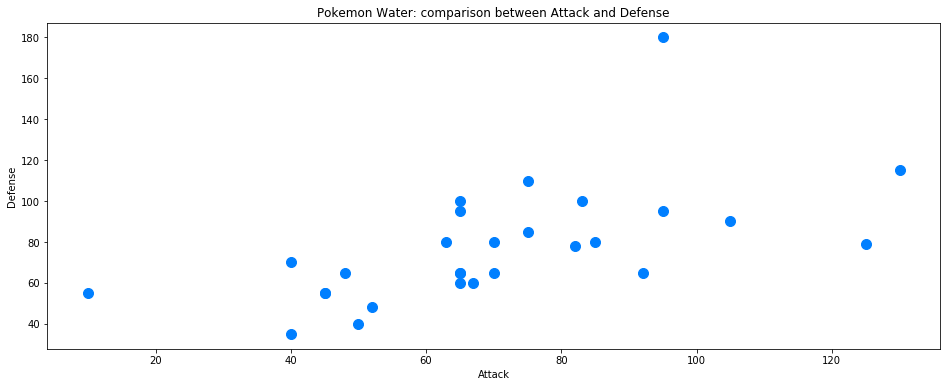

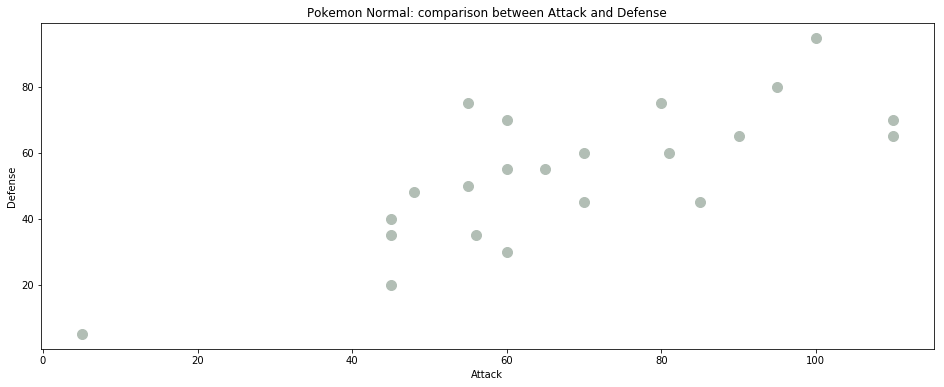

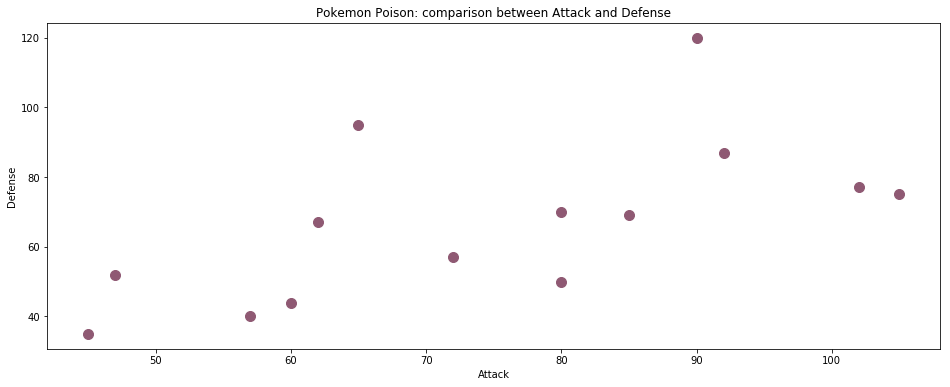

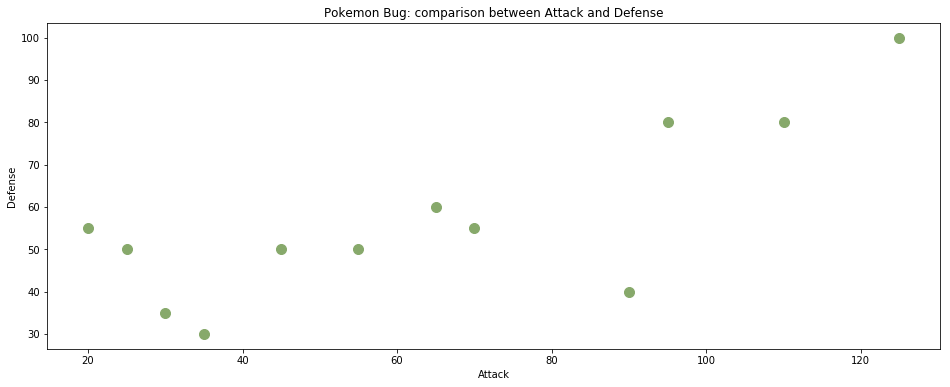

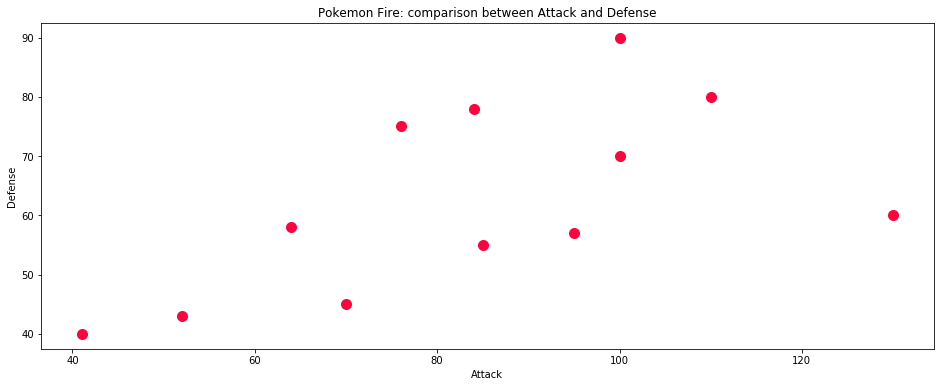

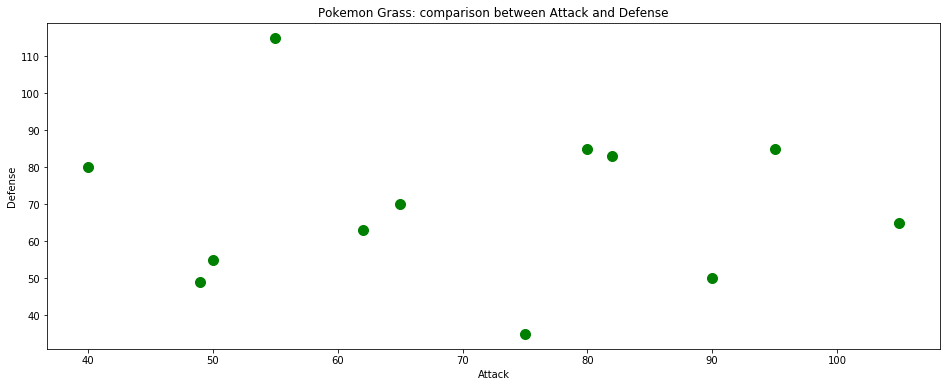

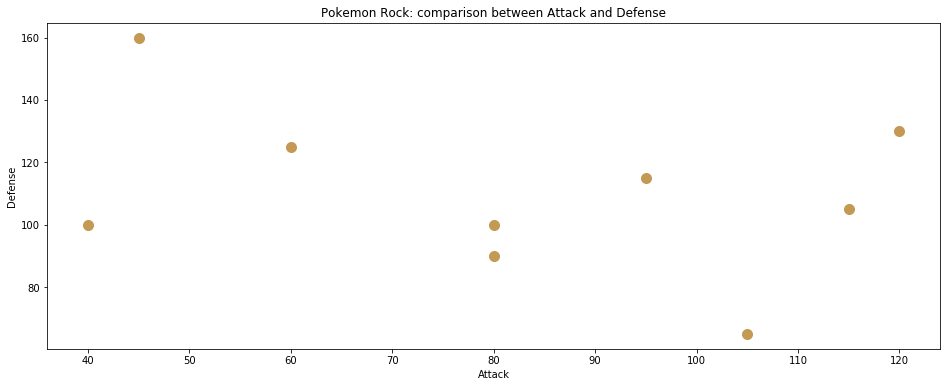

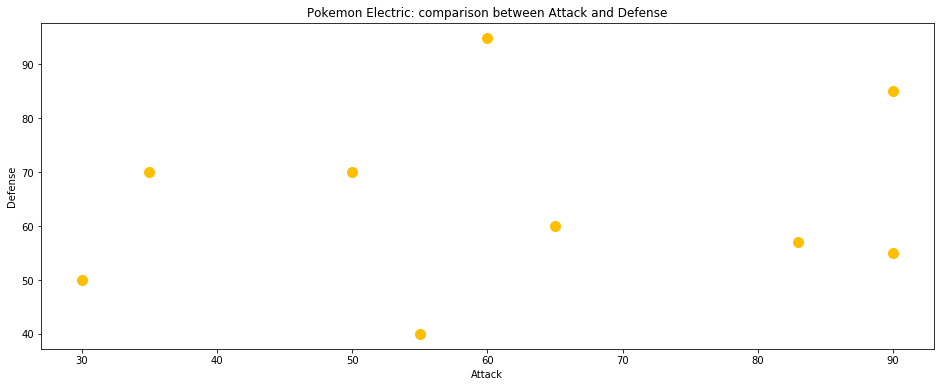

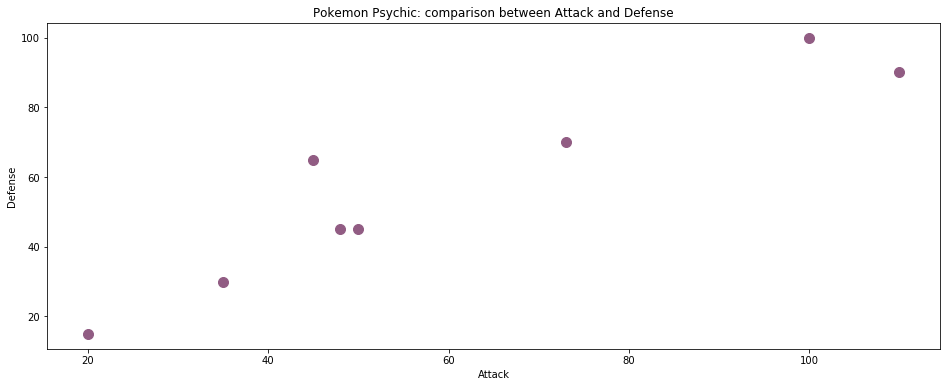

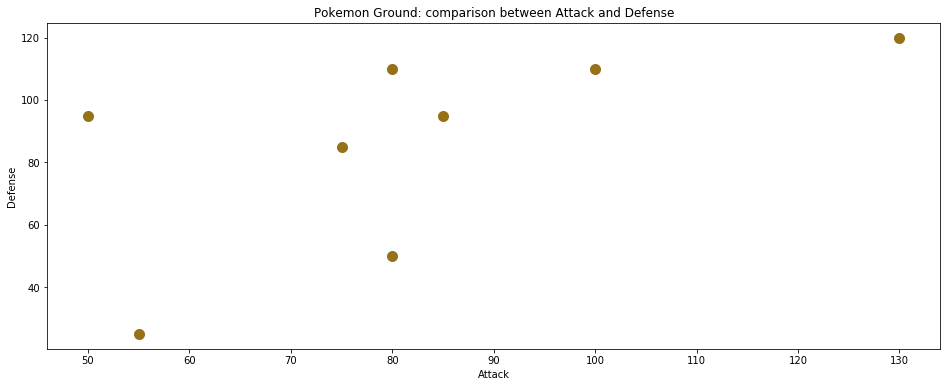

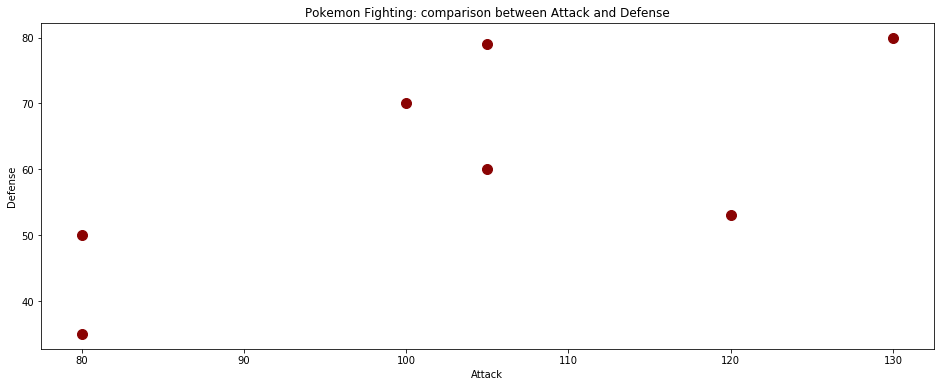

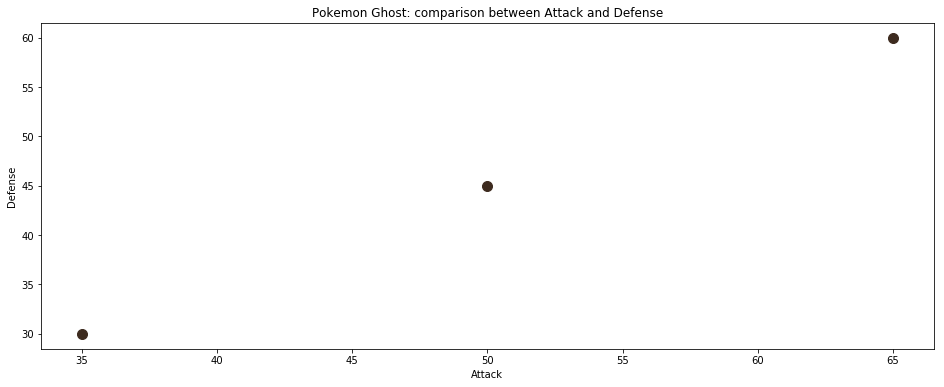

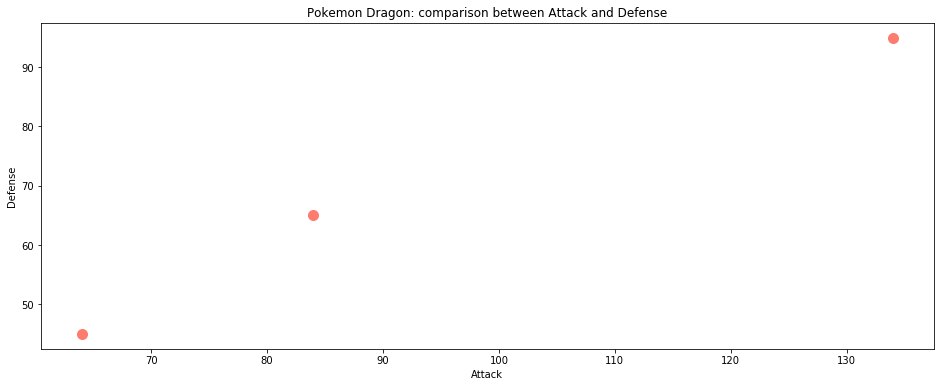

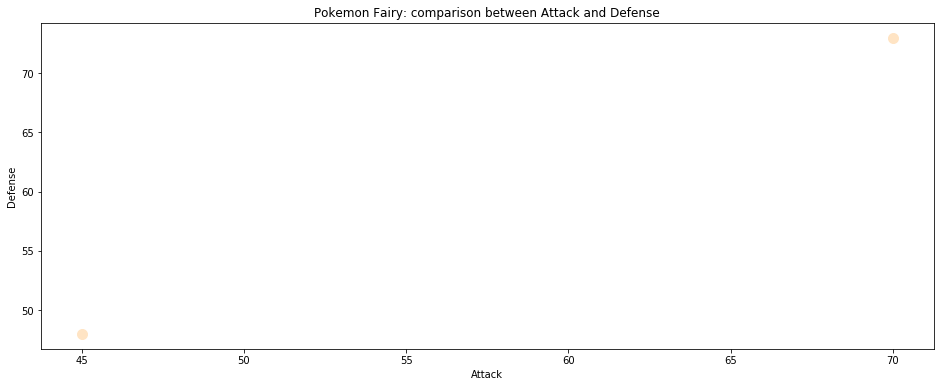

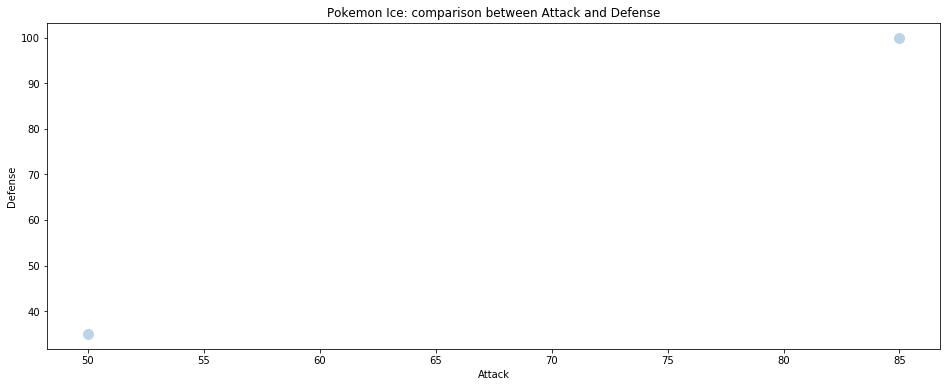

In [14]:
types = ['Water','Normal','Poison','Bug','Fire','Grass','Rock','Electric',
         'Psychic','Ground','Fighting','Ghost','Dragon','Fairy','Ice']
for t in types:
    tmp = poke_1[poke_1["Type 1"] == t].copy()
    
    plt.figure(figsize=(16,6))
    plt.scatter(tmp.Attack.values,tmp.Defense.values, color=col_dict[t],s=100)
    plt.xlabel("Attack")
    plt.title("Pokemon {}: comparison between Attack and Defense".format(t))
    plt.ylabel("Defense")
    plt.show()

#### CONCLUSION

I'm confident that if you are here it's because you are a nerd. 

My conclusion about this notebook is **...**

# ...

# ...

# ...

### C H A R I Z A R D